# Free stock market APIs

주식 시장 데이터 API는 현재 시장에서 거래되는 금융 자산에 대한 실시간 또는 과거 데이터를 제공합니다. 이러한 API는 일반적으로 공개 주식, ETF, ETN의 가격을 제공합니다.  
이러한 데이터는 거래 전략을 수립하고 시장을 모니터링하는 기반이 되는 기술 지표를 생성하는 데 사용할 수 있습니다. 

# 1. 야후 파이낸스
문서: [yfinance](https://github.com/ranaroussi/yfinance)  
tutorial: https://aroussi.com/post/python-yahoo-finance

In [1]:
import matplotlib.pyplot as plt

In [2]:
# !pip install -q yfinance
import yfinance as yf

- 미국 주식

In [3]:
df = yf.download('AAPL', start='2022-01-01', progress=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,150.740005,151.570007,146.699997,147.070007,147.070007,81420900
2022-07-19,147.919998,151.229996,146.910004,151.000000,151.000000,82982400
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400
2022-07-21,154.500000,155.570007,151.940002,155.350006,155.350006,65086600
2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400


- 한국 주식

In [4]:
df = yf.download('005930.KS', start='2022-01-01', progress=False) #삼성전자
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,60600.0,62000.0,60500.0,61900.0,61900.0,20832517
2022-07-19,61400.0,61500.0,60200.0,60900.0,60900.0,15248261
2022-07-20,61800.0,62100.0,60500.0,60500.0,60500.0,16782238
2022-07-21,61100.0,61900.0,60700.0,61800.0,61800.0,12291374
2022-07-22,61800.0,62200.0,61200.0,61300.0,61300.0,10261310


# 2. Pandas data_reader & FinanceDataReader

pandas-datareader 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다. 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.

FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

- 종목 코드  
거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500  


- 가격 데이터  
해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등  
국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등  
각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)  
환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율  
암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)  

In [5]:
#!pip install update finance-datareader

In [6]:
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

start = datetime.datetime(2020, 2, 19)
end = datetime.datetime(2022, 3, 4)

- 미국 주식

In [7]:
aapl = data_reader.DataReader("AAPL", data_source="yahoo", start=start, end=end)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-18,79.937500,78.652496,78.839996,79.750000,152531200.0,78.553581
2020-02-19,81.142502,80.000000,80.000000,80.904999,93984000.0,79.691261
2020-02-20,81.162498,79.552498,80.657501,80.074997,100566000.0,78.873711
2020-02-21,80.112503,77.625000,79.654999,78.262497,129554000.0,77.088387
2020-02-24,76.044998,72.307503,74.315002,74.544998,222195200.0,73.426666


- 한국 주식

In [8]:
samsung = data_reader.DataReader('005930.KS', data_source="yahoo", start=start, end=end)
samsung.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-19,60400.0,59400.0,59800.0,60200.0,12951496.0,55885.941406
2020-02-20,61300.0,59600.0,60700.0,60000.0,14591924.0,55700.273438
2020-02-21,59800.0,58500.0,58800.0,59200.0,13777393.0,54957.605469
2020-02-24,58100.0,56800.0,57400.0,56800.0,25627537.0,52729.601562
2020-02-25,58000.0,56200.0,56200.0,57900.0,23885408.0,53750.769531


In [9]:
stock = fdr.DataReader('068270', start)  #셀트리온
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-19,179269,180233,173487,174934,766594,-0.016263
2020-02-20,175414,175896,170114,172525,781485,-0.013771
2020-02-21,170114,174450,169632,170597,465625,-0.011175
2020-02-24,166258,168185,162885,162887,797522,-0.045194
2020-02-25,162885,166740,162403,166260,590282,0.020708


<AxesSubplot:xlabel='Date'>

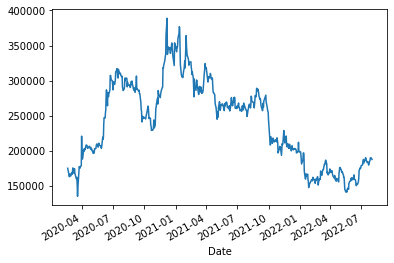

In [10]:
stock['Close'].plot()

- 원-달러 환율

In [11]:
df = data_reader.DataReader('DEXKOUS', 'fred', '2022-01-01')
df.head()

,DEXKOUS
DATE,
2022-01-03,1191.39
2022-01-04,1193.77
2022-01-05,1196.38
2022-01-06,1205.02
2022-01-07,1200.78


<AxesSubplot:xlabel='DATE'>

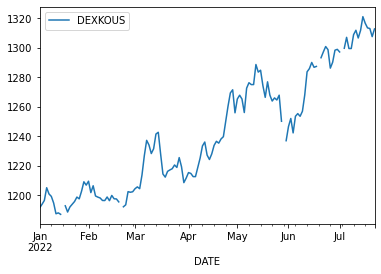

In [14]:
df.plot()